In [2]:
%matplotlib inline

# GPS data w/ python, Florian Wilhelm

https://github.com/FlorianWilhelm/gps_data_with_python/tree/master

https://youtu.be/jAKUPm-Cul0

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
import gpxpy
import gpxpy.gpx

from gps_utils import rdp

# Parsing an existing file:
# -------------------------

gpx_file = open('/Users/halilbayindir/Desktop/Physics-of-Rowing/data/activity_10578864150.gpx', 'r')

gpx = gpxpy.parse(gpx_file)

In [5]:
!gpxinfo '/Users/halilbayindir/Desktop/Physics-of-Rowing/data/activity_10578864150.gpx'

File: /Users/halilbayindir/Desktop/Physics-of-Rowing/data/activity_10578864150.gpx
    Length 2D: 6.262km
    Length 3D: 6.262km
    Moving time: 00:47:16
    Stopped time: 00:00:42
    Max speed: 2.75m/s = 9.90km/h (raw: 3.20m/s = 11.52km/h)
    Avg speed: 2.20m/s = 7.94km/h
    Total uphill: 0.00m
    Total downhill: 0.00m
    Started: 2023-02-25 05:11:11+00:00
    Ended: 2023-02-25 05:59:09+00:00
    Points: 794
    Avg distance between points: 7.89m

    Track #0, Segment #0
        Length 2D: 6.262km
        Length 3D: 6.262km
        Moving time: 00:47:16
        Stopped time: 00:00:42
        Max speed: 2.75m/s = 9.90km/h (raw: 3.20m/s = 11.52km/h)
        Avg speed: 2.20m/s = 7.94km/h
        Total uphill: 0.00m
        Total downhill: 0.00m
        Started: 2023-02-25 05:11:11+00:00
        Ended: 2023-02-25 05:59:09+00:00
        Points: 794
        Avg distance between points: 7.89m



In [6]:
moving_data = gpx.get_moving_data(raw=True)

In [7]:
moving_data

MovingData(moving_time=2836.0, stopped_time=42.0, moving_distance=6253.202901503913, stopped_distance=8.387952547166087, max_speed=3.19984486209668)

In [8]:
segment = gpx.tracks[0].segments[0]

In [9]:
coords = pd.DataFrame([
        {'lat': p.latitude, 
         'lon': p.longitude, 
         'ele': p.elevation,
         'time': p.time} for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
coords.head(4)

,lat,lon,ele
time,,,
2023-02-25 05:11:11+00:00,40.738518,30.285841,None
2023-02-25 05:11:12+00:00,40.738518,30.285840,None
2023-02-25 05:11:23+00:00,40.738504,30.285815,None
2023-02-25 05:11:25+00:00,40.738505,30.285807,None


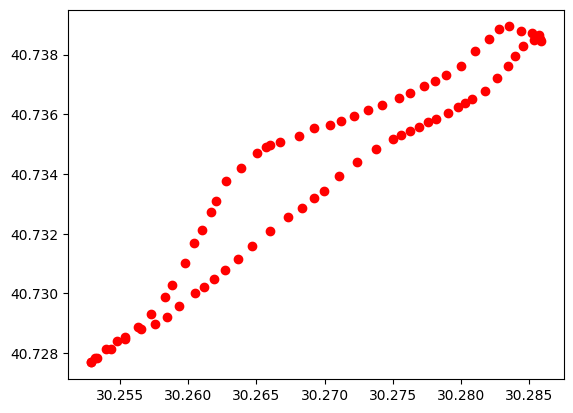

In [10]:
nskip=10
#plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values[::nskip], coords['lat'].values[::nskip], 'ro');

# Plot with mplleaflet

In [11]:
# prepare 3-laender-giro gps track
simple_coords = rdp(coords[['lon', 'lat']].values, epsilon=1e-5)

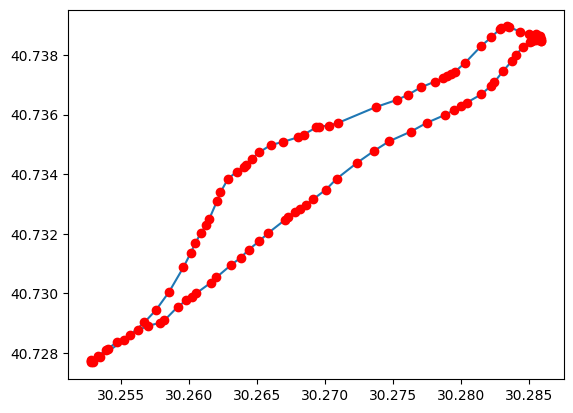

In [12]:
fig = plt.figure()
plt.plot(simple_coords[:, 0], simple_coords[:, 1])
plt.plot(simple_coords[:, 0], simple_coords[:, 1], 'ro');

# Speed

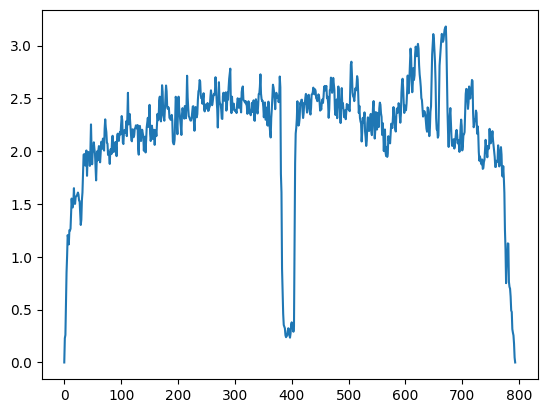

In [13]:
segment.points[0].speed, segment.points[-1].speed = 0., 0.
gpx.add_missing_speeds()
speed = np.array([p.speed for p in segment.points])
plt.plot(speed);


# Acceleration

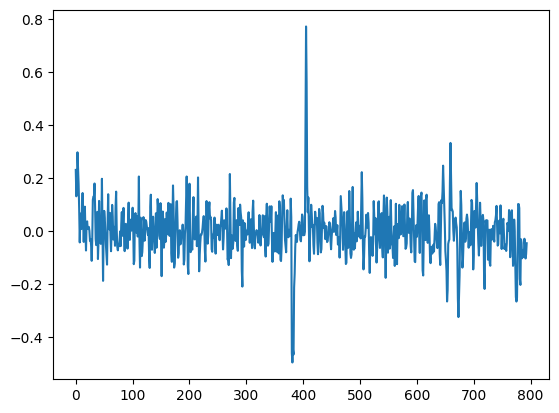

In [14]:
acceleration = np.gradient(speed)
plt.plot(acceleration)

# Resistance

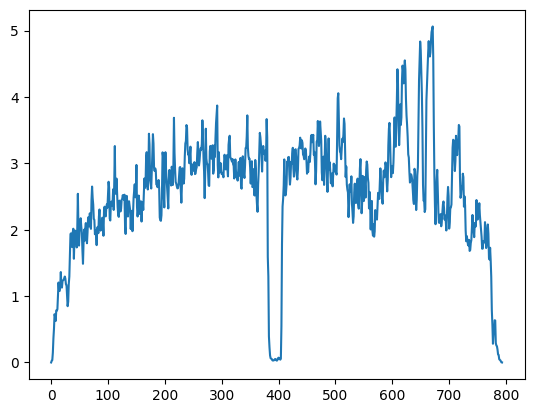

In [15]:
# if we assume that constants are equal to one
rho = 1 # rho = density
Cd = 1 # Cd = drag coefficient
Area = 1
Fdrag = 1/2*rho*Cd*Area*speed**2
plt.plot(Fdrag)

# Power

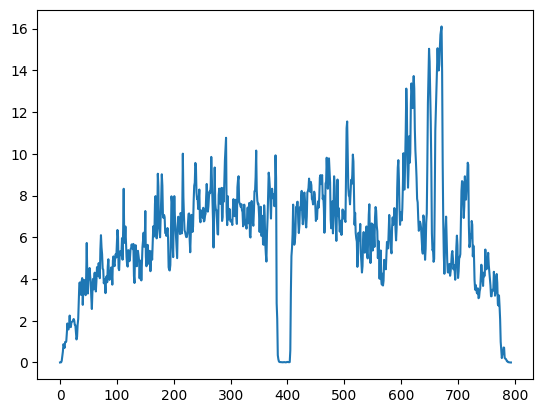

In [16]:

power = Fdrag*speed
plt.plot(power)  